# K-means Example

## Preliminaries

In [13]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import sys

sys.path.append("..")

import eskmeans.kmeans

In [5]:
# Utility variables and functions
colors = np.array([x for x in "bgrcmykbgrcmykbgrcmykbgrcmyk"])
colors = np.hstack([colors] * 20)

def plot_mixture_model(ax, model):
    X = np.array(model.X)
    ax.scatter(X[:, 0], X[:, 1], color=colors[model.assignments].tolist(), s=10)

## Toy dataset

In [6]:
random.seed(2)
np.random.seed(2)

# Data parameters
D = 2           # dimensions
N = 100         # number of points to generate
K_true = 4      # the true number of components

# Generate data
mu_scale = 4.0
covar_scale = 0.7
z_true = np.random.randint(0, K_true, N)
mu = np.random.randn(D, K_true)*mu_scale
X = mu[:, z_true] + np.random.randn(D, N)*covar_scale
X = X.T

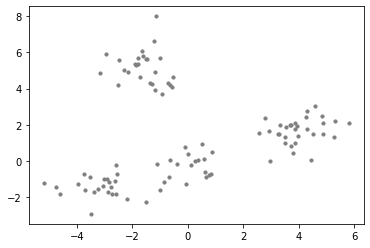

In [7]:
plt.scatter(X[:, 0], X[:, 1], color="gray", s=10)

## K-means clustering

In [9]:
# Model parameters
K = 4  # number of components
n_iter = 20

# Setup K-means model
kmeans = eskmeans.kmeans.KMeans(X, K, "spread")

In [10]:
# Inference
%time record = kmeans.fit(n_iter)

Iteration: 0, K: 4, n_mean_updates: 72, sample_time: 0.001987457275390625, sum_neg_sqrd_norm: -663.3436884121942
Iteration: 1, K: 4, n_mean_updates: 17, sample_time: 0.0015041828155517578, sum_neg_sqrd_norm: -416.65372748046775
Iteration: 2, K: 4, n_mean_updates: 16, sample_time: 0.0012204647064208984, sum_neg_sqrd_norm: -139.0792052156682
Iteration: 3, K: 4, n_mean_updates: 6, sample_time: 0.0011582374572753906, sum_neg_sqrd_norm: -112.98777602463754
Iteration: 4, K: 4, n_mean_updates: 2, sample_time: 0.001012563705444336, sum_neg_sqrd_norm: -108.3022381171297
Iteration: 5, K: 4, n_mean_updates: 0, sample_time: 0.0010030269622802734, sum_neg_sqrd_norm: -108.3022381171297
CPU times: user 10.2 ms, sys: 165 µs, total: 10.4 ms
Wall time: 8.14 ms


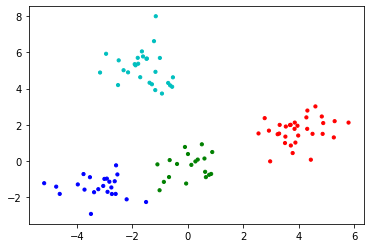

In [14]:
# Plot clusters
fig = plt.figure()
ax = fig.add_subplot(111)
plot_mixture_model(ax, kmeans)